# Numpy vs Pandas: Exercises 

First, let's import both libraries and create some sample data to work with.

In [23]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Exercise 1: Reading and Exploring Data

**Background:** Both pandas and NumPy can read CSV files, but with different results.

**Tasks:**
1. Read `sample_data.csv` using `np.genfromtxt()` with appropriate parameters
2. Read the same file using `pd.read_csv()`
3. Print the shape of both data structures
4. Check the data type of the NumPy array
5. Display the column names from the pandas DataFrame


In [24]:
# SOLUTION

# Read with NumPy
data_np = np.genfromtxt('sample_data.csv', delimiter=',', skip_header=1)
print("NumPy array:")
print(data_np)
print(f"\nShape: {data_np.shape}")
print(f"Data type: {data_np.dtype}")

# Read with pandas
df = pd.read_csv('sample_data.csv')
print("\nPandas DataFrame:")
print(df)
print(f"\nShape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

NumPy array:
[[ 1. 20. 85.  4.]
 [ 2. 21. nan  3.]
 [ 3. 19. 92.  4.]
 [ 4. 22. 88. nan]
 [ 5. 20. 76.  3.]
 [ 6. nan 91.  4.]
 [ 7. 21. 79.  3.]
 [ 8. 23. nan  2.]
 [ 9. 20. 95.  4.]
 [10. 22. 82. nan]]

Shape: (10, 4)
Data type: float64

Pandas DataFrame:
   id   age  score  grade
0   1  20.0   85.0    4.0
1   2  21.0    NaN    3.0
2   3  19.0   92.0    4.0
3   4  22.0   88.0    NaN
4   5  20.0   76.0    3.0
5   6   NaN   91.0    4.0
6   7  21.0   79.0    3.0
7   8  23.0    NaN    2.0
8   9  20.0   95.0    4.0
9  10  22.0   82.0    NaN

Shape: (10, 4)
Columns: ['id', 'age', 'score', 'grade']


## Exercise 2: Converting Between pandas and NumPy

**Background:** You can convert between pandas DataFrames and NumPy arrays in both directions.

**Tasks:**
1. Remove rows with missing values from the DataFrame using `.dropna()` and reset the index
2. Convert the cleaned DataFrame to a NumPy array using `.to_numpy()`
3. Also try using the `.values` attribute
4. Convert the NumPy array back to a pandas DataFrame with appropriate column names
5. Verify the column names and data types of the reconstructed DataFrame

In [25]:
# SOLUTION

# Clean the DataFrame
df_clean = df.dropna().reset_index(drop=True)
print("Cleaned DataFrame:")
print(df_clean)

# Convert to NumPy
arr_from_df = df_clean.to_numpy()
print("\nConverted to NumPy array:")
print(arr_from_df)
print(f"Type: {type(arr_from_df)}")

# Using .values (older method)
arr_values = df_clean.values
print("\nUsing .values:")
print(f"Same result? {np.array_equal(arr_from_df, arr_values)}")

# Convert back to DataFrame
df_reconstructed = pd.DataFrame(arr_from_df, columns=['id', 'age', 'score', 'grade'])
print("\nReconstructed DataFrame:")
print(df_reconstructed)
print(f"\nColumn names: {df_reconstructed.columns.tolist()}")
print(f"Data types:\n{df_reconstructed.dtypes}")

Cleaned DataFrame:
   id   age  score  grade
0   1  20.0   85.0    4.0
1   3  19.0   92.0    4.0
2   5  20.0   76.0    3.0
3   7  21.0   79.0    3.0
4   9  20.0   95.0    4.0

Converted to NumPy array:
[[ 1. 20. 85.  4.]
 [ 3. 19. 92.  4.]
 [ 5. 20. 76.  3.]
 [ 7. 21. 79.  3.]
 [ 9. 20. 95.  4.]]
Type: <class 'numpy.ndarray'>

Using .values:
Same result? True

Reconstructed DataFrame:
    id   age  score  grade
0  1.0  20.0   85.0    4.0
1  3.0  19.0   92.0    4.0
2  5.0  20.0   76.0    3.0
3  7.0  21.0   79.0    3.0
4  9.0  20.0   95.0    4.0

Column names: ['id', 'age', 'score', 'grade']
Data types:
id       float64
age      float64
score    float64
grade    float64
dtype: object


## Exercise 3: Indexing with `.iloc[]` and `.loc[]`

**Background:** Pandas offers position-based (`.iloc[]`) and label-based (`.loc[]`) indexing, while NumPy uses integer indexing.

**Tasks:**
1. Using NumPy array indexing, select the first 3 rows and columns 2-3 (score and grade)
2. Using `.iloc[]`, perform the same selection on the DataFrame
3. Using `.loc[]`, select rows 0-2 and columns 'score' and 'grade'
4. Select all ages greater than 20 using `.loc[]` with a boolean condition
5. Try using `df_clean[0]` and observe what happens (hint: it will error)

In [26]:
# SOLUTION

# NumPy indexing
numpy_slice = arr_from_df[:3, 2:4]
print("NumPy slice (rows 0-2, columns 2-3):")
print(numpy_slice)

# Pandas .iloc[] (position-based)
iloc_slice = df_clean.iloc[:3, 2:4]
print("\nPandas .iloc[] (rows 0-2, columns 2-3):")
print(iloc_slice)

# Pandas .loc[] (label-based)
loc_slice = df_clean.loc[0:2, 'score':'grade']
print("\nPandas .loc[] (rows 0-2, columns 'score' to 'grade'):")
print(loc_slice)
print("Note: .loc[] is inclusive on both ends!")

# Boolean indexing with .loc[]
age_filter = df_clean.loc[df_clean['age'] > 20, 'age']
print("\nAges > 20:")
print(age_filter)

# Try df_clean[0] - this will raise KeyError
try:
    result = df_clean[0]
except KeyError as e:
    print(f"\ndf_clean[0] raises KeyError: {e}")
    print("Reason: Single integers are interpreted as column names, not row indices!")
    print("Use .iloc[0] or .loc[0] for row selection.")

NumPy slice (rows 0-2, columns 2-3):
[[85.  4.]
 [92.  4.]
 [76.  3.]]

Pandas .iloc[] (rows 0-2, columns 2-3):
   score  grade
0   85.0    4.0
1   92.0    4.0
2   76.0    3.0

Pandas .loc[] (rows 0-2, columns 'score' to 'grade'):
   score  grade
0   85.0    4.0
1   92.0    4.0
2   76.0    3.0
Note: .loc[] is inclusive on both ends!

Ages > 20:
3    21.0
Name: age, dtype: float64

df_clean[0] raises KeyError: 0
Reason: Single integers are interpreted as column names, not row indices!
Use .iloc[0] or .loc[0] for row selection.


## Exercise 4: Statistical Operations and ddof

NumPy and pandas calculate standard deviation differently as they use different default values for the number of degrees of freedom (ddof).

**Tasks:**
1. Calculate the mean of each column using NumPy's `.mean(axis=0)`
2. Calculate the mean of each column using pandas' `.mean()`
3. Calculate the standard deviation using NumPy's `.std(axis=0)` (default ddof=0)
4. Calculate the standard deviation using pandas' `.std()` (default ddof=1)
5. Make NumPy match pandas by setting `ddof=1`
6. Explain when to use ddof=0 vs ddof=1

In [27]:
# SOLUTION

# Means
numpy_mean = arr_from_df.mean(axis=0)
pandas_mean = df_clean.mean()

print("Column means (NumPy):")
print(numpy_mean)
print("\nColumn means (pandas):")
print(pandas_mean)
print(f"\nMeans match? {np.allclose(numpy_mean, pandas_mean.values)}")

# Standard deviations with default settings
numpy_std = arr_from_df.std(axis=0)
pandas_std = df_clean.std()

print("\n" + "="*50)
print("Column std (NumPy, ddof=0 - population std):")
print(numpy_std)
print("\nColumn std (pandas, ddof=1 - sample std):")
print(pandas_std)
print(f"\nStd values match? {np.allclose(numpy_std, pandas_std.values)}")

# Make them match
numpy_std_sample = arr_from_df.std(axis=0, ddof=1)
print("\n" + "="*50)
print("Column std (NumPy with ddof=1):")
print(numpy_std_sample)
print(f"\nNow they match? {np.allclose(numpy_std_sample, pandas_std.values)}")

print("\n--- Explanation ---")
print("ddof=0 (population std): Use when you have the ENTIRE population")
print("ddof=1 (sample std): Use when you have a SAMPLE and want to estimate population std")
print("Sample std divides by (n-1), giving an unbiased estimate of population variance")

Column means (NumPy):
[ 5.  20.  85.4  3.6]

Column means (pandas):
id        5.0
age      20.0
score    85.4
grade     3.6
dtype: float64

Means match? True

Column std (NumPy, ddof=0 - population std):
[2.82842712 0.63245553 7.28285658 0.48989795]

Column std (pandas, ddof=1 - sample std):
id       3.162278
age      0.707107
score    8.142481
grade    0.547723
dtype: float64

Std values match? False

Column std (NumPy with ddof=1):
[3.16227766 0.70710678 8.14248119 0.54772256]

Now they match? True

--- Explanation ---
ddof=0 (population std): Use when you have the ENTIRE population
ddof=1 (sample std): Use when you have a SAMPLE and want to estimate population std
Sample std divides by (n-1), giving an unbiased estimate of population variance


## Exercise 5: Handling Missing Data

**Background:** Missing data requires different approaches in NumPy vs pandas.

**Tasks:**
1. Load the original data (with NaN values) using pandas
2. Count missing values per column using `.isna().sum()`
3. Calculate the mean of the 'score' column (pandas handles NaN automatically)
4. Convert to NumPy and calculate the mean - observe that NaN propagates
5. Use `np.nanmean()` to calculate the mean while ignoring NaN
6. Remove rows with NaN using NumPy's boolean indexing
7. Compare with pandas' `.dropna()` method

In [28]:
# SOLUTION

# Load data with missing values
df_missing = pd.read_csv('sample_data.csv')
print("DataFrame with missing values:")
print(df_missing)

# Count missing values
print("\nMissing values per column:")
print(df_missing.isna().sum())

# Pandas automatically skips NaN
score_mean_pandas = df_missing['score'].mean()
print(f"\nMean score (pandas, automatic NaN handling): {score_mean_pandas:.2f}")

# Convert to NumPy
data_with_nan = np.genfromtxt('sample_data.csv', delimiter=',', skip_header=1)
print("\nNumPy array with NaN:")
print(data_with_nan)

# NaN propagates in NumPy
score_mean_numpy = data_with_nan[:, 2].mean()  # Column 2 is 'score'
print(f"\nMean score (NumPy, NaN propagates): {score_mean_numpy}")

# Use np.nanmean to ignore NaN
score_mean_nanmean = np.nanmean(data_with_nan[:, 2])
print(f"Mean score (np.nanmean): {score_mean_nanmean:.2f}")

# Remove rows with NaN using NumPy
mask = ~np.isnan(data_with_nan).any(axis=1)
data_clean_numpy = data_with_nan[mask]
print(f"\nNumPy after removing NaN rows: {data_clean_numpy.shape}")

# Compare with pandas
df_clean_pandas = df_missing.dropna()
print(f"Pandas after .dropna(): {df_clean_pandas.shape}")

print("\n--- Comparison ---")
print("Pandas: Built-in NaN handling, high-level methods like .dropna(), .fillna()")
print("NumPy: Need explicit handling with np.isnan(), np.nanmean(), boolean indexing")

DataFrame with missing values:
   id   age  score  grade
0   1  20.0   85.0    4.0
1   2  21.0    NaN    3.0
2   3  19.0   92.0    4.0
3   4  22.0   88.0    NaN
4   5  20.0   76.0    3.0
5   6   NaN   91.0    4.0
6   7  21.0   79.0    3.0
7   8  23.0    NaN    2.0
8   9  20.0   95.0    4.0
9  10  22.0   82.0    NaN

Missing values per column:
id       0
age      1
score    2
grade    2
dtype: int64

Mean score (pandas, automatic NaN handling): 86.00

NumPy array with NaN:
[[ 1. 20. 85.  4.]
 [ 2. 21. nan  3.]
 [ 3. 19. 92.  4.]
 [ 4. 22. 88. nan]
 [ 5. 20. 76.  3.]
 [ 6. nan 91.  4.]
 [ 7. 21. 79.  3.]
 [ 8. 23. nan  2.]
 [ 9. 20. 95.  4.]
 [10. 22. 82. nan]]

Mean score (NumPy, NaN propagates): nan
Mean score (np.nanmean): 86.00

NumPy after removing NaN rows: (5, 4)
Pandas after .dropna(): (5, 4)

--- Comparison ---
Pandas: Built-in NaN handling, high-level methods like .dropna(), .fillna()
NumPy: Need explicit handling with np.isnan(), np.nanmean(), boolean indexing


## Exercise 6: Mathematical Operations on DataFrames

NumPy functions can be applied element-wise to pandas DataFrames.

**Tasks:**
1. Create a new column in `df_clean` called 'log_score' using `np.log()` on the 'score' column
2. Create a new column 'sqrt_grade' using `np.sqrt()` on the 'grade' column
3. Try applying `np.exp()` to the entire DataFrame (observe it works but may be meaningless)
4. Calculate the square of all numeric columns by multiplying the DataFrame by itself
5. Demonstrate that these operations are vectorized (fast)

In [29]:
# SOLUTION

# Create a working copy
df_math = df_clean.copy()

# Apply NumPy functions to create new columns
df_math['log_score'] = np.log(df_math['score'])
df_math['sqrt_grade'] = np.sqrt(df_math['grade'])

print("DataFrame with new calculated columns:")
print(df_math)

# Apply function to entire DataFrame
print("\nApplying np.exp() to entire DataFrame (meaningless but possible):")
exp_df = np.exp(df_math)
print(exp_df.head())

# Square all numeric values
df_squared = df_clean * df_clean
print("\nSquared DataFrame (element-wise):")
print(df_squared)

# Demonstrate vectorization speed
import time

# Create larger DataFrame
large_df = pd.DataFrame(np.random.randn(100000, 4), columns=['A', 'B', 'C', 'D'])

# Vectorized operation
start = time.time()
result_vec = np.sqrt(large_df['A'])
time_vec = time.time() - start

# Loop operation (slow)
start = time.time()
result_loop = [np.sqrt(x) for x in large_df['A']]
time_loop = time.time() - start

print(f"\n--- Vectorization Speed Test ---")
print(f"Vectorized operation: {time_vec:.6f} seconds")
print(f"Loop operation: {time_loop:.6f} seconds")
print(f"Speedup: {time_loop/time_vec:.1f}x faster")

DataFrame with new calculated columns:
   id   age  score  grade  log_score  sqrt_grade
0   1  20.0   85.0    4.0   4.442651    2.000000
1   3  19.0   92.0    4.0   4.521789    2.000000
2   5  20.0   76.0    3.0   4.330733    1.732051
3   7  21.0   79.0    3.0   4.369448    1.732051
4   9  20.0   95.0    4.0   4.553877    2.000000

Applying np.exp() to entire DataFrame (meaningless but possible):
            id           age         score      grade  log_score  sqrt_grade
0     2.718282  4.851652e+08  8.223013e+36  54.598150       85.0    7.389056
1    20.085537  1.784823e+08  9.017628e+39  54.598150       92.0    7.389056
2   148.413159  4.851652e+08  1.014800e+33  20.085537       76.0    5.652234
3  1096.633158  1.318816e+09  2.038281e+34  20.085537       79.0    5.652234
4  8103.083928  4.851652e+08  1.811239e+41  54.598150       95.0    7.389056

Squared DataFrame (element-wise):
   id    age   score  grade
0   1  400.0  7225.0   16.0
1   9  361.0  8464.0   16.0
2  25  400.0  5776.

/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/k2/zvg_gcvj6dz5q4_t5p1n04240000gp/T/ipykernel_68521/341121713.py:36: RuntimeWarning: invalid value encountered in sqrt
  result_loop = [np.sqrt(x) for x in large_df['A']]


## Exercise 7: Views vs Copies in NumPy

**Background:** NumPy slicing creates views by default, not copies. This is memory-efficient but can cause unexpected modifications.

**Tasks:**
1. Create a NumPy array `original = np.array([10, 20, 30, 40, 50])`
2. Create a slice `sliced = original[1:4]`
3. Modify `sliced[0] = 999` and observe the effect on `original`
4. Use `np.shares_memory()` to verify they share memory
5. Create an explicit copy using `.copy()` and show it's independent
6. Demonstrate when views are useful (memory efficiency) vs when copies are needed (safety)

In [30]:
# SOLUTION

# Create original array
original = np.array([10, 20, 30, 40, 50])
print("Original array:")
print(original)

# Create a slice (VIEW)
sliced = original[1:4]
print("\nSliced array (indices 1-3):")
print(sliced)

# Modify the slice
print("\nModifying sliced[0] = 999...")
sliced[0] = 999

print("\nAfter modification:")
print(f"Original: {original}")  # CHANGED!
print(f"Sliced: {sliced}")

# Check if they share memory
print(f"\nDo they share memory? {np.shares_memory(original, sliced)}")

print("\n" + "="*60)
print("Creating an independent COPY")

# Create new array
original2 = np.array([10, 20, 30, 40, 50])
copied = original2[1:4].copy()

print(f"Original2: {original2}")
print(f"Copied: {copied}")

# Modify the copy
print("\nModifying copied[0] = 888...")
copied[0] = 888

print("\nAfter modification:")
print(f"Original2: {original2}")  # UNCHANGED!
print(f"Copied: {copied}")
print(f"\nDo they share memory? {np.shares_memory(original2, copied)}")

print("\n--- Key Takeaways ---")
print("✓ NumPy slicing creates VIEWS by default (shares memory)")
print("✓ Modifying a view changes the original array")
print("✓ Use .copy() when you need an independent array")
print("✓ Views are memory-efficient, copies are safe")

Original array:
[10 20 30 40 50]

Sliced array (indices 1-3):
[20 30 40]

Modifying sliced[0] = 999...

After modification:
Original: [ 10 999  30  40  50]
Sliced: [999  30  40]

Do they share memory? True

Creating an independent COPY
Original2: [10 20 30 40 50]
Copied: [20 30 40]

Modifying copied[0] = 888...

After modification:
Original2: [10 20 30 40 50]
Copied: [888  30  40]

Do they share memory? False

--- Key Takeaways ---
✓ NumPy slicing creates VIEWS by default (shares memory)
✓ Modifying a view changes the original array
✓ Use .copy() when you need an independent array
✓ Views are memory-efficient, copies are safe


## Exercise 8: Views vs Copies in Pandas

Pandas behavior is more complex than NumPy. 

**Tasks:**
1. Create a test DataFrame with columns A, B, C
2. Filter rows where A > 2 and try to modify column B - observe the warning
3. Demonstrate the safe approach using `.copy()`
4. Show how to modify the original DataFrame directly using `.loc[]`
5. Explain when to use each approach

In [31]:
# SOLUTION

# Create test DataFrame
df_test = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
})

print("Original DataFrame:")
print(df_test)

print("\n" + "="*60)
print("PROBLEMATIC: Chained indexing (may trigger SettingWithCopyWarning)")
print("="*60)

# This may trigger a warning
df_subset = df_test[df_test['A'] > 2]
df_subset['B'] = 0  # Warning!

print("\nModified subset:")
print(df_subset)
print("\nOriginal DataFrame (may or may not be affected):")
print(df_test)

print("\n" + "="*60)
print("SAFE APPROACH 1: Explicit .copy()")
print("="*60)

df_test = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
})

df_safe_copy = df_test[df_test['A'] > 2].copy()
df_safe_copy['B'] = 999

print("Modified copy:")
print(df_safe_copy)
print("\nOriginal DataFrame (UNCHANGED):")
print(df_test)

print("\n" + "="*60)
print("SAFE APPROACH 2: Direct modification with .loc[]")
print("="*60)

# Modify original directly
df_test.loc[df_test['A'] > 2, 'C'] = 0

print("After .loc[] modification (original IS changed):")
print(df_test)

print("\n--- Best Practices ---")
print("✓ Use .copy() when you want to work with a subset independently")
print("✓ Use .loc[] when you want to modify the original DataFrame")
print("✓ Avoid chained indexing like df[df['A'] > 2]['B'] = value")

Original DataFrame:
   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
4  5  50  500

PROBLEMATIC: Chained indexing (may trigger SettingWithCopyWarning)

Modified subset:
   A  B    C
2  3  0  300
3  4  0  400
4  5  0  500

Original DataFrame (may or may not be affected):
   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
4  5  50  500

SAFE APPROACH 1: Explicit .copy()
Modified copy:
   A    B    C
2  3  999  300
3  4  999  400
4  5  999  500

Original DataFrame (UNCHANGED):
   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
4  5  50  500

SAFE APPROACH 2: Direct modification with .loc[]
After .loc[] modification (original IS changed):
   A   B    C
0  1  10  100
1  2  20  200
2  3  30    0
3  4  40    0
4  5  50    0

--- Best Practices ---
✓ Use .copy() when you want to work with a subset independently
✓ Use .loc[] when you want to modify the original DataFrame
✓ Avoid chained indexing like df[df['A'] > 2]['B'] = value


/var/folders/k2/zvg_gcvj6dz5q4_t5p1n04240000gp/T/ipykernel_68521/1716056425.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['B'] = 0  # Warning!


## Exercise 9: Boolean Filtering and Selection

**Background:** Both NumPy and pandas support boolean indexing, but pandas preserves labels and structure.

**Tasks:**
1. Using `df_clean`, create a boolean mask for students with score > 85
2. Filter the DataFrame using this mask
3. Create a combined condition: score > 80 AND age == 20
4. Do the same with the NumPy array
5. Compare the outputs - what information is lost in NumPy?
6. Use `.loc[]` to select only specific columns from filtered rows

In [32]:
# SOLUTION

print("Original data:")
print(df_clean)

# Simple boolean mask
mask_score = df_clean['score'] > 85
print("\nBoolean mask (score > 85):")
print(mask_score)

# Filter DataFrame
high_scorers = df_clean[mask_score]
print("\nStudents with score > 85:")
print(high_scorers)

# Combined condition
mask_combined = (df_clean['score'] > 80) & (df_clean['age'] == 20)
filtered = df_clean[mask_combined]
print("\nStudents with score > 80 AND age == 20:")
print(filtered)

print("\n" + "="*60)
print("Same filtering with NumPy")
print("="*60)

# NumPy boolean indexing
arr = df_clean.to_numpy()
# Columns: 0=id, 1=age, 2=score, 3=grade
mask_np = (arr[:, 2] > 80) & (arr[:, 1] == 20)
filtered_np = arr[mask_np]

print("NumPy filtered result:")
print(filtered_np)
print("\nWhat's lost in NumPy: No column names, no index labels!")

print("\n" + "="*60)
print("Using .loc[] for targeted selection")
print("="*60)

# Select specific columns from filtered rows
result = df_clean.loc[mask_combined, ['id', 'score']]
print("Only 'id' and 'score' columns for filtered students:")
print(result)

print("\n--- Comparison ---")
print("Pandas: Preserves structure, labels, allows column selection")
print("NumPy: Returns raw values, must remember column positions")

Original data:
   id   age  score  grade
0   1  20.0   85.0    4.0
1   3  19.0   92.0    4.0
2   5  20.0   76.0    3.0
3   7  21.0   79.0    3.0
4   9  20.0   95.0    4.0

Boolean mask (score > 85):
0    False
1     True
2    False
3    False
4     True
Name: score, dtype: bool

Students with score > 85:
   id   age  score  grade
1   3  19.0   92.0    4.0
4   9  20.0   95.0    4.0

Students with score > 80 AND age == 20:
   id   age  score  grade
0   1  20.0   85.0    4.0
4   9  20.0   95.0    4.0

Same filtering with NumPy
NumPy filtered result:
[[ 1. 20. 85.  4.]
 [ 9. 20. 95.  4.]]

What's lost in NumPy: No column names, no index labels!

Using .loc[] for targeted selection
Only 'id' and 'score' columns for filtered students:
   id  score
0   1   85.0
4   9   95.0

--- Comparison ---
Pandas: Preserves structure, labels, allows column selection
NumPy: Returns raw values, must remember column positions


## Exercise 10: Interoperability with Plotting

**Background:** While matplotlib can work with pandas DataFrames, some advanced plots require NumPy arrays.

**Tasks:**
1. Create a simple line plot using pandas columns directly
2. Create the same plot by converting to NumPy arrays first
3. Load `temperature_grid.csv` and use pandas `.pivot()` to create a 2D grid
4. Convert to NumPy arrays and use `np.meshgrid()` to create coordinate matrices
5. Create a contour plot using `plt.contourf()` (requires NumPy arrays)
6. Explain the workflow: pandas for data manipulation → NumPy for numerical operations → matplotlib for plotting

Part 1: Simple plotting with pandas vs NumPy


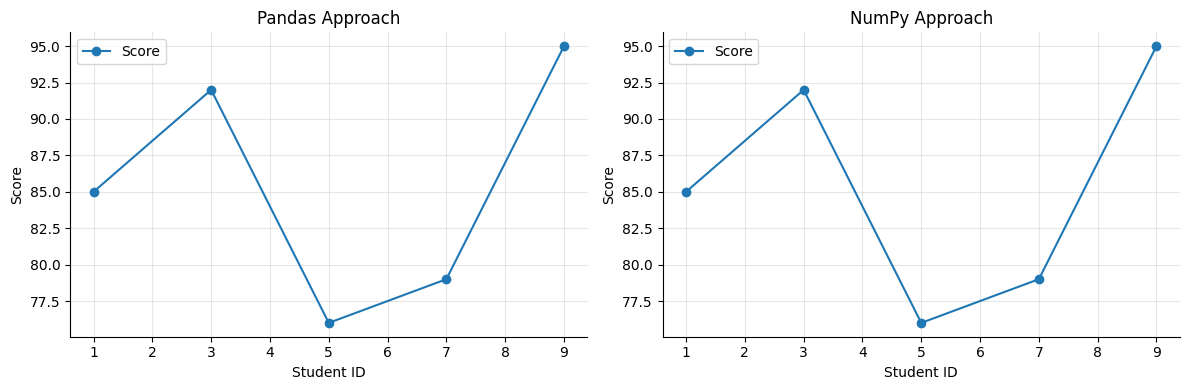

Both approaches produce identical plots!
Pandas: More convenient for labeled data
NumPy: More explicit, useful when you need arrays for other operations

Part 2: Contour plot (requires NumPy)

Temperature grid data (first 10 rows):
   x_position  y_position  temperature
0           0           0         20.5
1           0           1         21.2
2           0           2         22.8
3           0           3         23.1
4           0           4         22.5
5           1           0         22.1
6           1           1         23.5
7           1           2         25.2
8           1           3         24.8
9           1           4         23.9

Pivoted grid:
x_position     0     1     2     3     4
y_position                              
0           20.5  22.1  24.3  25.1  23.8
1           21.2  23.5  26.8  27.3  25.2
2           22.8  25.2  28.5  28.9  26.1
3           23.1  24.8  27.2  27.8  25.5
4           22.5  23.9  25.8  26.4  24.2

Array shapes: X=(5, 5), Y=(5, 5), Z=

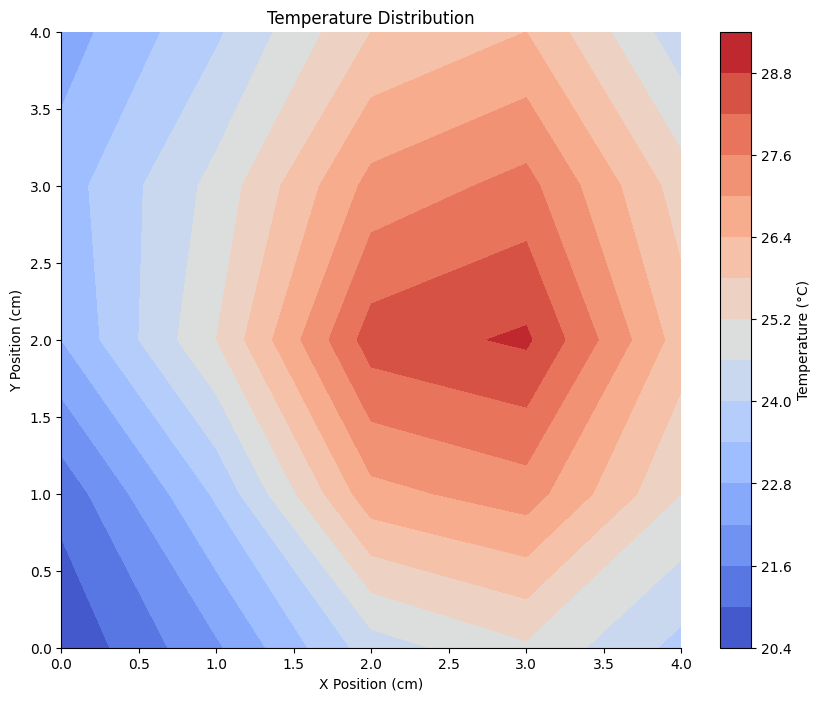


--- Workflow Summary ---
1. Pandas: Load and manipulate data (.read_csv, .pivot)
2. NumPy: Create coordinate arrays (.meshgrid, .to_numpy)
3. Matplotlib: Visualize with advanced plots (.contourf)

This workflow leverages the strengths of each library!


In [33]:
# SOLUTION

print("Part 1: Simple plotting with pandas vs NumPy")
print("="*60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Direct pandas plotting
ax1.plot(df_clean['id'], df_clean['score'], 'o-', label='Score')
ax1.set_xlabel('Student ID')
ax1.set_ylabel('Score')
ax1.set_title('Pandas Approach')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: NumPy arrays
x = df_clean['id'].to_numpy()
y = df_clean['score'].to_numpy()
ax2.plot(x, y, 'o-', label='Score')
ax2.set_xlabel('Student ID')
ax2.set_ylabel('Score')
ax2.set_title('NumPy Approach')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Both approaches produce identical plots!")
print("Pandas: More convenient for labeled data")
print("NumPy: More explicit, useful when you need arrays for other operations")

print("\n" + "="*60)
print("Part 2: Contour plot (requires NumPy)")
print("="*60)

# Load temperature data
temp_data = pd.read_csv('temperature_grid.csv')
print("\nTemperature grid data (first 10 rows):")
print(temp_data.head(10))

# Pivot to create 2D grid (pandas strength)
temp_grid = temp_data.pivot(index='y_position', columns='x_position', values='temperature')
print("\nPivoted grid:")
print(temp_grid)

# Convert to NumPy for plotting
Z = temp_grid.to_numpy()
X, Y = np.meshgrid(temp_grid.columns, temp_grid.index)

print(f"\nArray shapes: X={X.shape}, Y={Y.shape}, Z={Z.shape}")

# Create contour plot
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(X, Y, Z, levels=15, cmap='coolwarm')
ax.set_xlabel('X Position (cm)')
ax.set_ylabel('Y Position (cm)')
ax.set_title('Temperature Distribution')
plt.colorbar(contour, label='Temperature (°C)')
plt.show()

print("\n--- Workflow Summary ---")
print("1. Pandas: Load and manipulate data (.read_csv, .pivot)")
print("2. NumPy: Create coordinate arrays (.meshgrid, .to_numpy)")
print("3. Matplotlib: Visualize with advanced plots (.contourf)")
print("\nThis workflow leverages the strengths of each library!")